In [29]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.9746459963987609

In [30]:
predict1 = knr.predict([[50]])
predict2 = knr.predict([[100]])

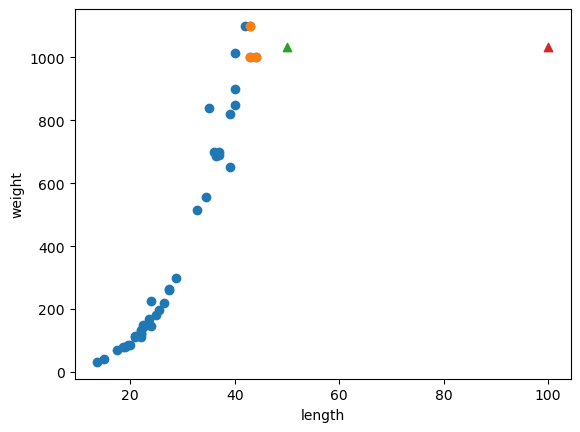

In [35]:
distance, indexes = knr.kneighbors([[50]])
#distance1, indexes1 = knr.kneighbors([[50]])
#distance2, indexes2 = knr.kneighbors([[100]])

import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes])
#plt.scatter(train_input[indexes2], train_target[indexes2])
plt.scatter(50, predict1, marker = '^')
plt.scatter(100, predict2, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

lr.predict([[50]])

array([1241.83860323])

In [39]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


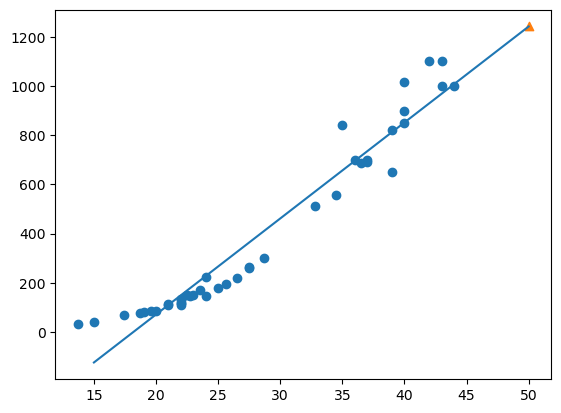

In [40]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, lr.predict([[50]]), marker = '^')
plt.show()
                

In [43]:
lr.score(train_input, train_target)
lr.score(test_input, test_target)

0.8247503123313558

In [48]:
lr.predict([[100]])
lr.predict([[50]])
lr.predict([[15]])

array([-123.7614705])

In [51]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

#3차 다항식 회귀 곡선 학습
#train_poly_3rd = np.column_stack((train_input**3, train_input**2, train_input))
#test_poly_3rd = np.column_stack((test_input**3, test_input**2, test_input))

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
print(lr.predict([[50**2, 50]]))
#lr.predict([[15**2, 15]])

print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


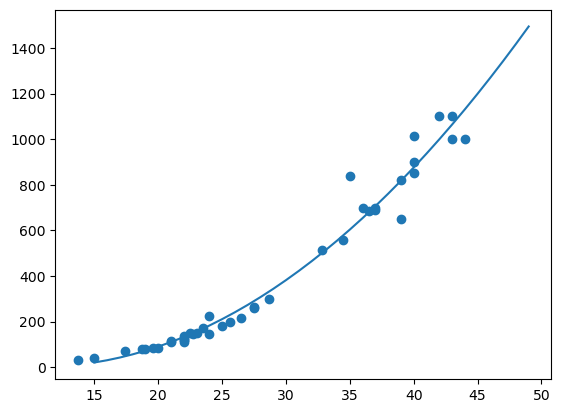

In [67]:
x = np.arange(15,50)

plt.scatter(train_input, train_target)
plt.plot(x, 1.014*x**2 -21.558*x + 116.05)
plt.show()

In [ ]:
lr.score(train_poly, train_target)
lr.score(test_poly, test_target)

lr.predict([[10**2, 10]])
lr.predict([[300**2, 300]])
#학습했을 때과 같은 형태로 x값을 전달해야함

array([84938.56256104])